In [1]:
import warnings
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
EXP_ID = "apch"
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
stats_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_stats.csv")
stats_df.head()

,project,precision,recall,f1,auc,gmean,ap,specifi
0,activemq,0.009766,0.232422,0.105469,0.556641,0.769531,0.375000,3.710938e-02
1,camel,0.069013,0.000001,0.000683,0.340081,0.000017,0.197440,5.192026e-09
2,cassandra,0.002543,0.005679,0.840534,0.329983,0.116544,0.230513,6.248650e-04
3,flink,0.000058,0.034035,0.293377,0.013624,0.313835,0.002279,1.149616e-03
4,groovy,0.032768,0.014088,0.647655,0.388376,0.039989,0.010689,2.420936e-02


In [4]:
# prepare data for heatmap of p-values
annot_p_values = np.array(stats_df.iloc[:, 1:])
p_values = np.where(annot_p_values < ALPHA, 1, 0)
p_values = pd.DataFrame(p_values, columns=stats_df.columns[1:])
annot_p_values = pd.DataFrame(annot_p_values, columns=stats_df.columns[1:])
p_values["project"] = stats_df["project"]
annot_p_values["project"] = stats_df["project"]
p_values = p_values.set_index("project")
annot_p_values = annot_p_values.set_index("project")

p_values = p_values.astype(int)
print(p_values.head())

annot_p_values = annot_p_values.round(3)
print(annot_p_values.head())

           precision  recall  f1  auc  gmean  ap  specifi
project                                                  
activemq           1       0   0    0      0   0        1
camel              0       1   1    0      1   0        1
cassandra          1       1   0    0      0   0        1
flink              1       1   0    1      0   1        1
groovy             1       1   0    0      1   1        1
           precision  recall     f1    auc  gmean     ap  specifi
project                                                          
activemq       0.010   0.232  0.105  0.557  0.770  0.375    0.037
camel          0.069   0.000  0.001  0.340  0.000  0.197    0.000
cassandra      0.003   0.006  0.841  0.330  0.117  0.231    0.001
flink          0.000   0.034  0.293  0.014  0.314  0.002    0.001
groovy         0.033   0.014  0.648  0.388  0.040  0.011    0.024


In [5]:
# print latex table
print(annot_p_values.to_latex())

\begin{tabular}{lrrrrrrr}
\toprule
{} &  precision &  recall &     f1 &    auc &  gmean &     ap &  specifi \\
project   &            &         &        &        &        &        &          \\
\midrule
activemq  &      0.010 &   0.232 &  0.105 &  0.557 &  0.770 &  0.375 &    0.037 \\
camel     &      0.069 &   0.000 &  0.001 &  0.340 &  0.000 &  0.197 &    0.000 \\
cassandra &      0.003 &   0.006 &  0.841 &  0.330 &  0.117 &  0.231 &    0.001 \\
flink     &      0.000 &   0.034 &  0.293 &  0.014 &  0.314 &  0.002 &    0.001 \\
groovy    &      0.033 &   0.014 &  0.648 &  0.388 &  0.040 &  0.011 &    0.024 \\
hbase     &      0.000 &   0.000 &  0.098 &  0.234 &  0.000 &  0.018 &    0.000 \\
hive      &      0.017 &   0.011 &  0.194 &  0.583 &  0.011 &  0.194 &    0.002 \\
ignite    &      0.049 &   0.527 &  0.121 &  0.075 &  0.705 &  0.132 &    0.060 \\
\bottomrule
\end{tabular}



<AxesSubplot: ylabel='project'>

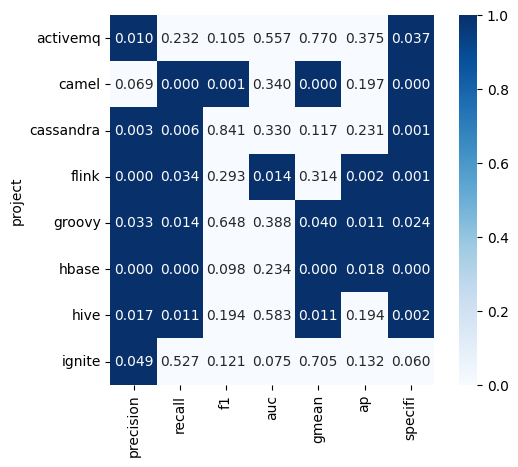

In [6]:
sns.heatmap(p_values, annot=annot_p_values, cmap="Blues", fmt=".3f", vmin=0, vmax=1, square=True)